In [2]:
import ipynb_setup

from src.data_loader.data_loader import Dataset

from src.model.catboost_model import CatBoost
from src.model.adaboost import AdaBoost
from src.model.extra_tree import ExtraTree
from src.model.lgbm import LGBM
from src.model.xgb import XGB

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from sklearn.utils import compute_sample_weight

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import Pipeline

In [3]:
CATEGORICAL_FEATURES = ['Condition', 'Clouds', 'Day/Night', 'Snow_Priority']
path = '../data/processed/with_traffic_count.csv'
dataset = Dataset(path, CATEGORICAL_FEATURES)
x, x_test, y, y_test = dataset.clean_and_encode_data(test_size=0.3)
len(x), len(x_test)

Columns: ['FeelsLike', 'Precip.', 'StreetWidth_Min', 'POSTED_SPEED', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes', 'TRAFFIC_C', 'TRAFFIC_1hPtoC', 'LL_X', 'LL_Y', 'LL_Z', 'HOUR_SIN', 'HOUR_COS', 'MONTH_SIN', 'MONTH_COS', 'DOW_SIN', 'DOW_COS', 'Condition_CLD', 'Condition_LVS', 'Condition_RD', 'Clouds_BKN', 'Clouds_CLR', 'Clouds_FEW', 'Clouds_OVC', 'Clouds_SCT', 'Day/Night_D', 'Day/Night_N', 'Snow_Priority_C', 'Snow_Priority_H', 'Snow_Priority_S', 'Snow_Priority_V']


(16006, 6860)

# WITH TRAFFIC COUNT

## XGBoost

In [14]:
x = x.drop(columns=['TRAFFIC_C'])
x_test = x_test.drop(columns=['TRAFFIC_C'])
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=0.5, random_state=42)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_new, y_new = pipeline.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y_new)
print(counter)

class_weights = compute_sample_weight('balanced', y_new)

xgb = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1240, 
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0.3, 
                    subsample=0.8, 
                    colsample_bytree=0.8,
                    objective= 'multi:softmax',
                    num_class=2,
                    nthread=4,
                    seed=27,
                    use_label_encoder=False)


xgb.fit(x_new, y_new, sample_weight=class_weights, early_stopping_rounds=20, eval_set=[(x_test, y_test)])

Counter({0: 12943, 1: 3063})
Counter({0: 12943, 1: 6471})
[22:45:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.67381
[1]	validation_0-mlogloss:0.65620
[2]	validation_0-mlogloss:0.64063
[3]	validation_0-mlogloss:0.62704
[4]	validation_0-mlogloss:0.61459
[5]	validation_0-mlogloss:0.60379
[6]	validation_0-mlogloss:0.59318
[7]	validation_0-mlogloss:0.58379
[8]	validation_0-mlogloss:0.57594
[9]	validation_0-mlogloss:0.56911
[10]	validation_0-mlogloss:0.56260
[11]	validation_0-mlogloss:0.55635
[12]	validation_0-mlogloss:0.55127
[13]	validation_0-mlogloss:0.54640
[14]	validation_0-mlogloss:0.54159
[15]	validation_0-mlogloss:0.53731
[16]	validation_0-mlogloss:0.53342
[17]	validation_0-mlogloss:0.52988
[18]	validation_0-mlogloss:0.52670
[19]	validation_0-mlogloss:0.52206


[223]	validation_0-mlogloss:0.43644
[224]	validation_0-mlogloss:0.43640
[225]	validation_0-mlogloss:0.43651
[226]	validation_0-mlogloss:0.43672
[227]	validation_0-mlogloss:0.43677
[228]	validation_0-mlogloss:0.43702
[229]	validation_0-mlogloss:0.43703
[230]	validation_0-mlogloss:0.43694
[231]	validation_0-mlogloss:0.43670
[232]	validation_0-mlogloss:0.43654
[233]	validation_0-mlogloss:0.43679
[234]	validation_0-mlogloss:0.43675
[235]	validation_0-mlogloss:0.43665
[236]	validation_0-mlogloss:0.43666
[237]	validation_0-mlogloss:0.43665
[238]	validation_0-mlogloss:0.43656
[239]	validation_0-mlogloss:0.43664
[240]	validation_0-mlogloss:0.43677
[241]	validation_0-mlogloss:0.43702
[242]	validation_0-mlogloss:0.43695
[243]	validation_0-mlogloss:0.43686


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1240, n_jobs=4, nthread=4, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Accuracy: 
 0.825801749271137 
 F1: 
 0.825801749271137 
 F1_2: 
 0.8043885717045173 
 Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      5508
           1       0.61      0.33      0.43      1352

    accuracy                           0.83      6860
   macro avg       0.73      0.64      0.66      6860
weighted avg       0.80      0.83      0.80      6860

[[5222  909]
 [ 286  443]]


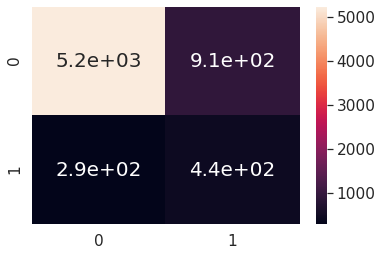

In [15]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

prediction = xgb.predict_proba(x_test).argmax(axis=1)
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='micro')
f1_2 = f1_score(y_test, prediction, average='weighted')
report = classification_report(y_test, prediction)

print(f'Accuracy: \n {accuracy} \n F1: \n {f1} \n F1_2: \n {f1_2} \n Classification report: \n {report}')

print(confusion_matrix(prediction, y_test))

sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(prediction, y_test), annot=True, annot_kws={"size": 20})

plt.show()

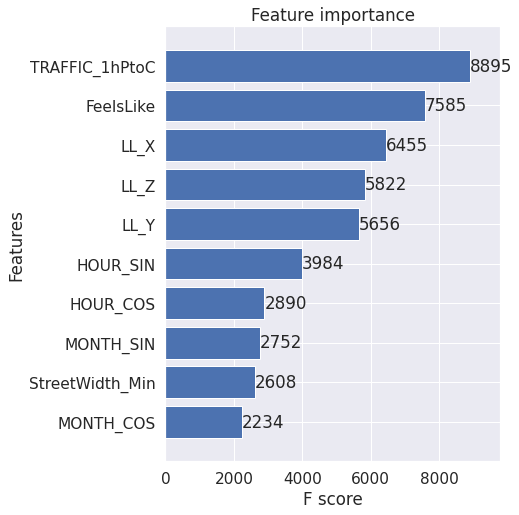

In [16]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6,8))
plot_importance(xgb, max_num_features=10, height=0.8, ax=ax)
plt.show()

In [6]:
from xgboost import plot_tree
from sklearn import tree

#plt.figure(figsize=(80,80))  # set plot size (denoted in inches)
#plot_tree(xgb, fontsize=380, num_trees=2)
#plt.show()
#plt.savefig('tree_high_dpi', dpi=2500)

# BIG DATASET

In [27]:
CATEGORICAL_FEATURES = ['Condition', 'Clouds', 'Day/Night', 'Snow_Priority']
path = '../data/processed/merged_data_2.csv'
dataset = Dataset(path, CATEGORICAL_FEATURES)
x, x_test, y, y_test = dataset.clean_and_encode_data(test_size=0.1)
len(x), len(x_test)

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Columns: ['FeelsLike', 'Precip.', 'StreetWidth_Min', 'POSTED_SPEED', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes', 'LL_X', 'LL_Y', 'LL_Z', 'HOUR_SIN', 'HOUR_COS', 'MONTH_SIN', 'MONTH_COS', 'DOW_SIN', 'DOW_COS', 'Condition_CLD', 'Condition_LVS', 'Condition_RD', 'Clouds_BKN', 'Clouds_CLR', 'Clouds_FEW', 'Clouds_OVC', 'Clouds_SCT', 'Day/Night_D', 'Day/Night_N', 'Snow_Priority_C', 'Snow_Priority_H', 'Snow_Priority_S', 'Snow_Priority_V']


(653906, 72657)

In [30]:
df = pd.read_csv(path)
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'ON STREET NAME', 'HOUR', 'Temperature', 'FeelsLike',
       'Dew', 'Humidity', 'Wind', 'WindSpeed', 'Pressure', 'Precip.',
       'Condition', 'Day/Night', 'Clouds', 'SEVERITY', 'geometry', 'NonPed',
       'StreetWidth_Min', 'XFrom', 'YFrom', 'XTo', 'YTo', 'POSTED_SPEED',
       'Snow_Priority', 'Number_Travel_Lanes', 'Number_Park_Lanes',
       'Number_Total_Lanes', 'TRUCK_ROUTE_TYPE'],
      dtype='object')

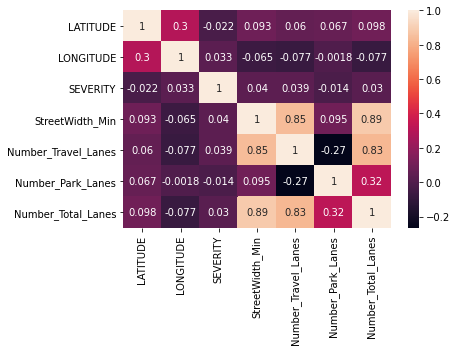

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df[[
    #'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
    #'LONGITUDE', 'ON STREET NAME', 'HOUR', 'Temperature', 'FeelsLike',
    #'Dew', 'Humidity', 'Wind', 'WindSpeed', 'Pressure', 'Precip.',
    #'Condition', 'Day/Night', 'Clouds', 'SEVERITY', 'geometry', 'NonPed',
    #'StreetWidth_Min', 'XFrom', 'YFrom', 'XTo', 'YTo', 'POSTED_SPEED',
    #'Snow_Priority', 'Number_Travel_Lanes', 'Number_Park_Lanes',
    #'Number_Total_Lanes', 'TRUCK_ROUTE_TYPE'
    
    #'Temperature', 'FeelsLike',
    #'Dew', 'Humidity', 'Wind', 'WindSpeed', 'Pressure', 'Precip.',
    #'Condition', 'Day/Night', 'Clouds'
    
    #'LATITUDE','LONGITUDE', 'SEVERITY', 'StreetWidth_Min', 'Number_Travel_Lanes', 'Number_Park_Lanes',
    #'Number_Total_Lanes', 
]].corr()

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
from imblearn.under_sampling import RandomUnderSampler

counter = Counter(y)
print(counter)
# define pipeline
under = RandomUnderSampler(sampling_strategy=0.35, random_state=42)
over = SMOTE(sampling_strategy=0.5, random_state=42)
steps = [('u', under), ('o', over)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x_new, y_new = pipeline.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y_new)
print(counter)

class_weights = compute_sample_weight('balanced', y_new)

xgb = XGBClassifier(learning_rate=0.1, 
                    n_estimators=1240, 
                    max_depth=9,
                    min_child_weight=1,
                    gamma=0.3, 
                    subsample=0.8, 
                    colsample_bytree=0.8,
                    objective= 'multi:softmax',
                    num_class=2,
                    nthread=4,
                    seed=27,
                    use_label_encoder=False)


xgb.fit(x_new, y_new, sample_weight=class_weights, early_stopping_rounds=20, eval_set=[(x_test, y_test)])

Counter({0: 531914, 1: 121992})
Counter({0: 348548, 1: 174274})
[21:14:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:0.68558
[1]	validation_0-mlogloss:0.67997
[2]	validation_0-mlogloss:0.67498
[3]	validation_0-mlogloss:0.67046
[4]	validation_0-mlogloss:0.66538
[5]	validation_0-mlogloss:0.66177
[6]	validation_0-mlogloss:0.65882
[7]	validation_0-mlogloss:0.65509
[8]	validation_0-mlogloss:0.65142
[9]	validation_0-mlogloss:0.64912
[10]	validation_0-mlogloss:0.64696
[11]	validation_0-mlogloss:0.64441
[12]	validation_0-mlogloss:0.64223
[13]	validation_0-mlogloss:0.64026
[14]	validation_0-mlogloss:0.63864
[15]	validation_0-mlogloss:0.63646
[16]	validation_0-mlogloss:0.63504
[17]	validation_0-mlogloss:0.63356
[18]	validation_0-mlogloss:0.63197
[19]	validation_0-mlogloss:0.

[222]	validation_0-mlogloss:0.58036
[223]	validation_0-mlogloss:0.58031
[224]	validation_0-mlogloss:0.58029
[225]	validation_0-mlogloss:0.58024
[226]	validation_0-mlogloss:0.58017
[227]	validation_0-mlogloss:0.58013
[228]	validation_0-mlogloss:0.58011
[229]	validation_0-mlogloss:0.58010
[230]	validation_0-mlogloss:0.58006
[231]	validation_0-mlogloss:0.58003
[232]	validation_0-mlogloss:0.58000
[233]	validation_0-mlogloss:0.57998
[234]	validation_0-mlogloss:0.57986
[235]	validation_0-mlogloss:0.57987
[236]	validation_0-mlogloss:0.57979
[237]	validation_0-mlogloss:0.57974
[238]	validation_0-mlogloss:0.57964
[239]	validation_0-mlogloss:0.57963
[240]	validation_0-mlogloss:0.57959
[241]	validation_0-mlogloss:0.57958
[242]	validation_0-mlogloss:0.57948
[243]	validation_0-mlogloss:0.57945
[244]	validation_0-mlogloss:0.57937
[245]	validation_0-mlogloss:0.57935
[246]	validation_0-mlogloss:0.57927
[247]	validation_0-mlogloss:0.57922
[248]	validation_0-mlogloss:0.57917
[249]	validation_0-mlogloss:

[450]	validation_0-mlogloss:0.57302
[451]	validation_0-mlogloss:0.57302
[452]	validation_0-mlogloss:0.57301
[453]	validation_0-mlogloss:0.57301
[454]	validation_0-mlogloss:0.57299
[455]	validation_0-mlogloss:0.57295
[456]	validation_0-mlogloss:0.57294
[457]	validation_0-mlogloss:0.57290
[458]	validation_0-mlogloss:0.57287
[459]	validation_0-mlogloss:0.57293
[460]	validation_0-mlogloss:0.57285
[461]	validation_0-mlogloss:0.57285
[462]	validation_0-mlogloss:0.57280
[463]	validation_0-mlogloss:0.57281
[464]	validation_0-mlogloss:0.57274
[465]	validation_0-mlogloss:0.57270
[466]	validation_0-mlogloss:0.57266
[467]	validation_0-mlogloss:0.57261
[468]	validation_0-mlogloss:0.57257
[469]	validation_0-mlogloss:0.57251
[470]	validation_0-mlogloss:0.57250
[471]	validation_0-mlogloss:0.57242
[472]	validation_0-mlogloss:0.57239
[473]	validation_0-mlogloss:0.57230
[474]	validation_0-mlogloss:0.57229
[475]	validation_0-mlogloss:0.57228
[476]	validation_0-mlogloss:0.57220
[477]	validation_0-mlogloss:

[678]	validation_0-mlogloss:0.56820
[679]	validation_0-mlogloss:0.56821
[680]	validation_0-mlogloss:0.56820
[681]	validation_0-mlogloss:0.56816
[682]	validation_0-mlogloss:0.56812
[683]	validation_0-mlogloss:0.56812
[684]	validation_0-mlogloss:0.56810
[685]	validation_0-mlogloss:0.56809
[686]	validation_0-mlogloss:0.56810
[687]	validation_0-mlogloss:0.56808
[688]	validation_0-mlogloss:0.56805
[689]	validation_0-mlogloss:0.56802
[690]	validation_0-mlogloss:0.56798
[691]	validation_0-mlogloss:0.56797
[692]	validation_0-mlogloss:0.56794
[693]	validation_0-mlogloss:0.56790
[694]	validation_0-mlogloss:0.56790
[695]	validation_0-mlogloss:0.56793
[696]	validation_0-mlogloss:0.56792
[697]	validation_0-mlogloss:0.56790
[698]	validation_0-mlogloss:0.56790
[699]	validation_0-mlogloss:0.56785
[700]	validation_0-mlogloss:0.56785
[701]	validation_0-mlogloss:0.56785
[702]	validation_0-mlogloss:0.56781
[703]	validation_0-mlogloss:0.56778
[704]	validation_0-mlogloss:0.56775
[705]	validation_0-mlogloss:

[906]	validation_0-mlogloss:0.56485
[907]	validation_0-mlogloss:0.56484
[908]	validation_0-mlogloss:0.56482
[909]	validation_0-mlogloss:0.56481
[910]	validation_0-mlogloss:0.56478
[911]	validation_0-mlogloss:0.56473
[912]	validation_0-mlogloss:0.56472
[913]	validation_0-mlogloss:0.56472
[914]	validation_0-mlogloss:0.56467
[915]	validation_0-mlogloss:0.56469
[916]	validation_0-mlogloss:0.56468
[917]	validation_0-mlogloss:0.56466
[918]	validation_0-mlogloss:0.56463
[919]	validation_0-mlogloss:0.56463
[920]	validation_0-mlogloss:0.56467
[921]	validation_0-mlogloss:0.56463
[922]	validation_0-mlogloss:0.56463
[923]	validation_0-mlogloss:0.56460
[924]	validation_0-mlogloss:0.56459
[925]	validation_0-mlogloss:0.56455
[926]	validation_0-mlogloss:0.56453
[927]	validation_0-mlogloss:0.56454
[928]	validation_0-mlogloss:0.56453
[929]	validation_0-mlogloss:0.56451
[930]	validation_0-mlogloss:0.56452
[931]	validation_0-mlogloss:0.56450
[932]	validation_0-mlogloss:0.56449
[933]	validation_0-mlogloss:

[1130]	validation_0-mlogloss:0.56171
[1131]	validation_0-mlogloss:0.56173
[1132]	validation_0-mlogloss:0.56168
[1133]	validation_0-mlogloss:0.56168
[1134]	validation_0-mlogloss:0.56164
[1135]	validation_0-mlogloss:0.56165
[1136]	validation_0-mlogloss:0.56167
[1137]	validation_0-mlogloss:0.56162
[1138]	validation_0-mlogloss:0.56162
[1139]	validation_0-mlogloss:0.56161
[1140]	validation_0-mlogloss:0.56158
[1141]	validation_0-mlogloss:0.56158
[1142]	validation_0-mlogloss:0.56155
[1143]	validation_0-mlogloss:0.56153
[1144]	validation_0-mlogloss:0.56152
[1145]	validation_0-mlogloss:0.56151
[1146]	validation_0-mlogloss:0.56154
[1147]	validation_0-mlogloss:0.56149
[1148]	validation_0-mlogloss:0.56150
[1149]	validation_0-mlogloss:0.56149
[1150]	validation_0-mlogloss:0.56146
[1151]	validation_0-mlogloss:0.56146
[1152]	validation_0-mlogloss:0.56147
[1153]	validation_0-mlogloss:0.56151
[1154]	validation_0-mlogloss:0.56148
[1155]	validation_0-mlogloss:0.56145
[1156]	validation_0-mlogloss:0.56140
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1240, n_jobs=4, nthread=4, num_class=2,
              num_parallel_tree=1, objective='multi:softmax', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

Accuracy: 
 0.7301292373756142 
 F1: 
 0.7301292373756143 
 F1_2: 
 0.7305855689832618 
 Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83     58912
           1       0.29      0.29      0.29     13745

    accuracy                           0.73     72657
   macro avg       0.56      0.56      0.56     72657
weighted avg       0.73      0.73      0.73     72657

[[49047  9743]
 [ 9865  4002]]


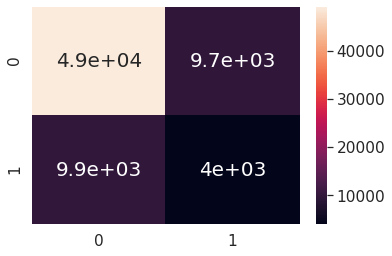

In [11]:
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

prediction = xgb.predict_proba(x_test).argmax(axis=1)
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='micro')
f1_2 = f1_score(y_test, prediction, average='weighted')
report = classification_report(y_test, prediction)

print(f'Accuracy: \n {accuracy} \n F1: \n {f1} \n F1_2: \n {f1_2} \n Classification report: \n {report}')

print(confusion_matrix(prediction, y_test))

sns.set(font_scale=1.4) # for label size
sns.heatmap(confusion_matrix(prediction, y_test), annot=True, annot_kws={"size": 20})

plt.show()

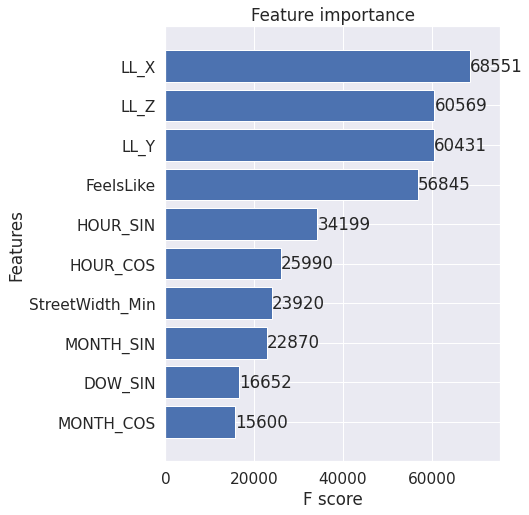

In [12]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(6,8))
plot_importance(xgb, max_num_features=10, height=0.8, ax=ax)
plt.show()

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

def bar_plot_column(df, name):
    plt.figure(figsize = (8,10))
    sns.countplot(y=name, data=df, order=df[name].value_counts().index)
    plt.title('Count of ' + name)
    plt.ylabel(name)
    plt.xlabel('Count')
    plt.show()

In [4]:
def inspect_potential_causality(df, treatment):
    print(df[treatment][df['SEVERITY'] == 0].describe(), df[treatment][df['SEVERITY'] == 1].describe())
    print('\n')
    print(df[treatment][df['SEVERITY'] == 0].value_counts(), df[treatment][df['SEVERITY'] == 1].value_counts())
    print('\n')
    bar_plot_column(df[df['SEVERITY'] == 0], treatment)
    bar_plot_column(df[df['SEVERITY'] == 1], treatment)

In [19]:
df = pd.read_csv(path)

df['MINUTE'] = df['CRASH TIME'].apply(lambda x: x.split(':')[1])
df['MINUTE'] = df['MINUTE'].astype(int)
df['HOUR'] = df['CRASH TIME'].apply(lambda x: x.split(':')[0])
df['HOUR'] = df['HOUR'].astype(int)
df['YEAR'] = (df['CRASH DATE'].apply(lambda x: x.split('-')[0])).astype(int)
df['MONTH'] = (df['CRASH DATE'].apply(lambda x: x.split('-')[1])).astype(int)
df['DOW'] = (df['CRASH DATE'].apply(lambda x: pd.Timestamp(x).dayofweek)).astype(int)
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'ON STREET NAME', 'HOUR', 'Temperature', 'FeelsLike',
       'Dew', 'Humidity', 'Wind', 'WindSpeed', 'Pressure', 'Precip.',
       'Condition', 'Day/Night', 'Clouds', 'SEVERITY', 'geometry', 'NonPed',
       'StreetWidth_Min', 'XFrom', 'YFrom', 'XTo', 'YTo', 'POSTED_SPEED',
       'Snow_Priority', 'Number_Travel_Lanes', 'Number_Park_Lanes',
       'Number_Total_Lanes', 'TRUCK_ROUTE_TYPE', 'TRAFFIC_C', 'TRAFFIC_1hPtoC',
       'MINUTE', 'YEAR', 'MONTH', 'DOW'],
      dtype='object')

count    18438.000000
mean         6.757457
std          3.438543
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MONTH, dtype: float64 count    4416.000000
mean        6.776495
std         3.378514
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: MONTH, dtype: float64


10    1919
9     1695
11    1693
5     1609
12    1572
7     1529
6     1495
1     1402
8     1395
3     1394
2     1370
4     1365
Name: MONTH, dtype: int64 6     429
9     429
10    422
11    398
7     390
5     383
12    361
8     359
1     342
3     339
2     286
4     278
Name: MONTH, dtype: int64




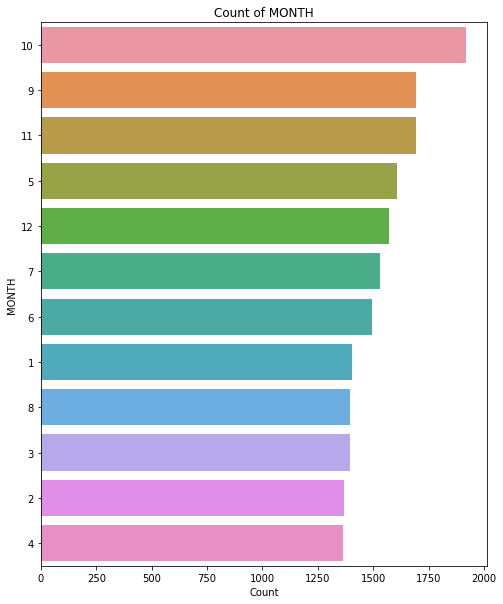

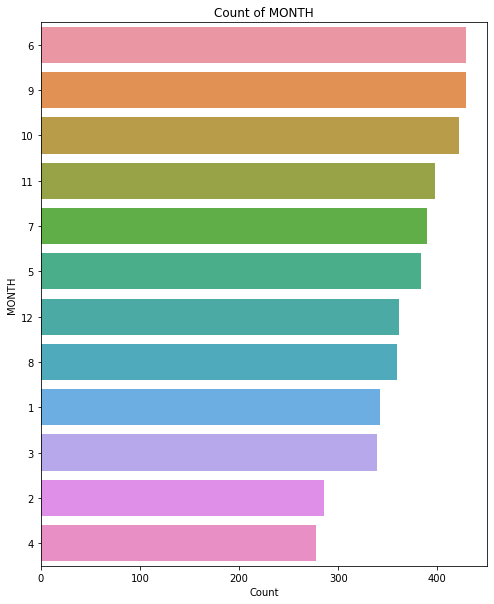

In [22]:
import pandas as pd

inspect_potential_causality(df, 'MONTH')